In [37]:
import numpy as np
import pandas as pd

In [38]:
import pandas as pd

# Assuming the CSV file is in the Datasets folder at the same level as your script/notebook
df = pd.read_csv('Datasets/Churn_Modelling.csv')


In [39]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [41]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [43]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [44]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [45]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [46]:
X=df.drop(columns='Exited')
y=df['Exited'].values

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_trf=scaler.fit_transform(X_train)
X_test_trf=scaler.transform(X_test)

In [49]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model=Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
#model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
history=model.fit(X_train,y_train,batch_size=250,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
26/26 [==============================] - 2s 18ms/step - loss: 10885.6758 - accuracy: 0.7958 - val_loss: 8424.5703 - val_accuracy: 0.7969
Epoch 2/10
26/26 [==============================] - 0s 6ms/step - loss: 6410.7808 - accuracy: 0.7958 - val_loss: 4528.9229 - val_accuracy: 0.7969
Epoch 3/10
26/26 [==============================] - 0s 6ms/step - loss: 3126.6860 - accuracy: 0.6341 - val_loss: 2210.5403 - val_accuracy: 0.5306
Epoch 4/10
26/26 [==============================] - 0s 6ms/step - loss: 1400.7242 - accuracy: 0.5317 - val_loss: 803.4849 - val_accuracy: 0.4925
Epoch 5/10
26/26 [==============================] - 0s 6ms/step - loss: 480.8391 - accuracy: 0.6864 - val_loss: 369.0257 - val_accuracy: 0.7569
Epoch 6/10
26/26 [==============================] - 0s 7ms/step - loss: 238.6641 - accuracy: 0.7158 - val_loss: 142.3519 - val_accuracy: 0.7356
Epoch 7/10
26/26 [==============================] - 0s 7ms/step - loss: 96.6552 - accuracy: 0.7105 - val_loss: 82.9978 - val_ac

In [54]:
model.layers[1].get_weights()

[array([[-0.37729195,  0.38804114,  0.32140243,  0.6463076 , -0.49022573,
          0.40564263,  0.42493644, -0.2313594 , -0.32521725, -0.03509996,
          0.15960658],
        [ 0.10959399, -0.12083513, -0.49080214,  0.00812626, -0.33473602,
         -0.07804114, -0.43986344, -0.3149494 ,  0.07076055,  0.21301687,
          0.2946515 ],
        [-0.27635407, -0.35073793,  0.08323146,  0.5068158 , -0.4377702 ,
         -0.4631287 , -0.44358552, -0.24557646,  0.37537867, -0.45283014,
         -0.07466163],
        [ 0.07885569,  0.07277783,  0.27510646, -0.09911378, -0.5221479 ,
          0.22484976, -0.43656713,  0.15152943, -0.21234822,  0.2912236 ,
          0.49703625],
        [-0.11604199,  0.26287395, -0.21040815,  0.37738794,  0.2952361 ,
          0.26627582,  0.11865884, -0.05455869, -0.30337965, -0.25456923,
          0.13808972],
        [-0.20457743, -0.43445176,  0.3734575 ,  0.34985334,  0.00960315,
          0.16200535, -0.11588628, -0.0745589 ,  0.06811798,  0.5042376

In [55]:
y_log =model.predict(X_test)

63/63 [==============================] - 0s 3ms/step


In [56]:
y_pred = np.where(y_log > 0.5,1,0)

In [57]:
#y_pred=y_pred.argmax(axis=-1)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7215

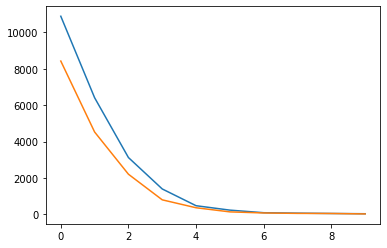

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


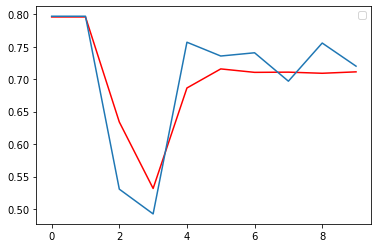

In [60]:
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'])
plt.legend()

In [61]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [183]:
#again run above code